In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import pre_data as eda


# 상관관계 높은 컬럼 병합

In [13]:

# 컬럼 간의 상관관계를 고려하여 PCA로 병합하는 함수
def merge_correlated_columns_with_pca(data, positive_threshold=0.9, negative_threshold=-0.9):
    # 상관계수 행렬 계산 (컬럼 간 상관관계)
    corr_matrix = data.corr()

    # 양의 상관관계 그룹과 음의 상관관계 그룹을 저장할 리스트
    positive_correlated_groups = []
    negative_correlated_groups = []

    # 이미 병합된 피처들을 추적하기 위한 세트
    used_columns = set()

    for i in range(len(corr_matrix.columns)):
        if corr_matrix.columns[i] not in used_columns:
            # i번째 컬럼과 상관계수가 positive_threshold 이상인 피처 그룹 추출 (양의 상관관계)
            high_positive_corr_cols = corr_matrix.columns[corr_matrix.iloc[i] >= positive_threshold].tolist()
            high_positive_corr_cols = [col for col in high_positive_corr_cols if col not in used_columns]

            # i번째 컬럼과 상관계수가 negative_threshold 이하인 피처 그룹 추출 (음의 상관관계)
            high_negative_corr_cols = corr_matrix.columns[corr_matrix.iloc[i] <= negative_threshold].tolist()
            high_negative_corr_cols = [col for col in high_negative_corr_cols if col not in used_columns]

            # 양의 상관관계 그룹 추가
            if len(high_positive_corr_cols) > 1:
                positive_correlated_groups.append(high_positive_corr_cols)
                used_columns.update(high_positive_corr_cols)

            # 음의 상관관계 그룹 추가
            if len(high_negative_corr_cols) > 1:
                negative_correlated_groups.append(high_negative_corr_cols)
                used_columns.update(high_negative_corr_cols)

    # PCA를 사용해 상관계수가 높은 컬럼 그룹을 병합
    data_pca_merged = data.copy()

    # 양의 상관관계 그룹에 대해 PCA 적용
    for group in positive_correlated_groups:
        pca = PCA(n_components=1)
        data_pca_merged[f'{"_".join(group)}_pca_pos'] = pca.fit_transform(data[group])
        print(f"Positive Correlation Group Merged: {group} -> {'_'.join(group)}_pca_pos")

    # 음의 상관관계 그룹에 대해 PCA 적용
    for group in negative_correlated_groups:
        pca = PCA(n_components=1)
        data_pca_merged[f'{"_".join(group)}_pca_neg'] = pca.fit_transform(data[group])
        print(f"Negative Correlation Group Merged: {group} -> {'_'.join(group)}_pca_neg")

    return data_pca_merged, positive_correlated_groups, negative_correlated_groups

# 예시 데이터 로드 (실제 데이터로 변경해 사용)
data = pd.read_csv('./data/train.csv', encoding='cp949')
# 데이터 로드 및 전처리
preprocessed_data = eda.preprocessing(data)

# 1. 데이터 전처리 (범주형 데이터 변환 및 스케일링)
object_columns = preprocessed_data.select_dtypes(include=['object'])
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)
# 상관계수 0.9 이상(양의 상관관계), -0.9 이하(음의 상관관계)인 컬럼을 그룹화하여 PCA로 병합
merged_data, pos_groups, neg_groups = merge_correlated_columns_with_pca(convert_data, positive_threshold=0.6, negative_threshold=-0.6)

# 결과 확인
print("Merged DataFrame:")
print(merged_data.head())

print("\nPositive Correlated Column Groups Merged by PCA:")
for group in pos_groups:
    print(group)

print("\nNegative Correlated Column Groups Merged by PCA:")
for group in neg_groups:
    print(group)


Positive Correlation Group Merged: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes', 'ReceivedCalls', 'PeakCallsInOut'] -> MonthlyRevenue_MonthlyMinutes_TotalRecurringCharge_OverageMinutes_ReceivedCalls_PeakCallsInOut_pca_pos
Positive Correlation Group Merged: ['PercChangeMinutes', 'PercChangeRevenues'] -> PercChangeMinutes_PercChangeRevenues_pca_pos
Positive Correlation Group Merged: ['DroppedCalls', 'OffPeakCallsInOut', 'DroppedBlockedCalls'] -> DroppedCalls_OffPeakCallsInOut_DroppedBlockedCalls_pca_pos
Positive Correlation Group Merged: ['OutboundCalls', 'InboundCalls'] -> OutboundCalls_InboundCalls_pca_pos
Positive Correlation Group Merged: ['UniqueSubs', 'ActiveSubs'] -> UniqueSubs_ActiveSubs_pca_pos
Positive Correlation Group Merged: ['Handsets', 'HandsetModels'] -> Handsets_HandsetModels_pca_pos
Positive Correlation Group Merged: ['AgeHH1', 'AgeHH2', 'HasCreditCard', 'IncomeGroup'] -> AgeHH1_AgeHH2_HasCreditCard_IncomeGroup_pca_pos
Positive Correlati

In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import pre_data as eda

# 컬럼 간의 상관관계를 고려하여 PCA로 병합하는 함수
def merge_correlated_columns_with_pca(data, positive_threshold=0.9, negative_threshold=-0.9):
    # 상관계수 행렬 계산 (컬럼 간 상관관계)
    corr_matrix = data.corr()

    # 양의 상관관계 그룹과 음의 상관관계 그룹을 저장할 리스트
    positive_correlated_groups = []
    negative_correlated_groups = []

    # 이미 병합된 피처들을 추적하기 위한 세트
    used_columns = set()

    for i in range(len(corr_matrix.columns)):
        if corr_matrix.columns[i] not in used_columns:
            # i번째 컬럼과 상관계수가 positive_threshold 이상인 피처 그룹 추출 (양의 상관관계)
            high_positive_corr_cols = corr_matrix.columns[corr_matrix.iloc[i] >= positive_threshold].tolist()
            high_positive_corr_cols = [col for col in high_positive_corr_cols if col not in used_columns]

            # i번째 컬럼과 상관계수가 negative_threshold 이하인 피처 그룹 추출 (음의 상관관계)
            high_negative_corr_cols = corr_matrix.columns[corr_matrix.iloc[i] <= negative_threshold].tolist()
            high_negative_corr_cols = [col for col in high_negative_corr_cols if col not in used_columns]

            # 양의 상관관계 그룹 추가
            if len(high_positive_corr_cols) > 1:
                positive_correlated_groups.append(high_positive_corr_cols)
                used_columns.update(high_positive_corr_cols)

            # 음의 상관관계 그룹 추가
            if len(high_negative_corr_cols) > 1:
                negative_correlated_groups.append(high_negative_corr_cols)
                used_columns.update(high_negative_corr_cols)

    # PCA를 사용해 상관계수가 높은 컬럼 그룹을 병합
    data_pca_merged = data.copy()

    # 양의 상관관계 그룹에 대해 PCA 적용
    for group in positive_correlated_groups:
        pca = PCA(n_components=1)
        data_pca_merged[f'{"_".join(group)}_pca_pos'] = pca.fit_transform(data[group])
        print(f"Positive Correlation Group Merged: {group} -> {'_'.join(group)}_pca_pos")
        # 기존 컬럼 제거
        data_pca_merged.drop(columns=group, inplace=True)

    # 음의 상관관계 그룹에 대해 PCA 적용
    for group in negative_correlated_groups:
        pca = PCA(n_components=1)
        data_pca_merged[f'{"_".join(group)}_pca_neg'] = pca.fit_transform(data[group])
        print(f"Negative Correlation Group Merged: {group} -> {'_'.join(group)}_pca_neg")
        # 기존 컬럼 제거
        data_pca_merged.drop(columns=group, inplace=True)

    return data_pca_merged, positive_correlated_groups, negative_correlated_groups

# 예시 데이터 로드 (실제 데이터로 변경해 사용)
data = pd.read_csv('./data/train.csv', encoding='cp949')
# 데이터 로드 및 전처리
preprocessed_data = eda.preprocessing(data)

# 1. 데이터 전처리 (범주형 데이터 변환 및 스케일링)
object_columns = preprocessed_data.select_dtypes(include=['object'])
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)

# 상관계수 0.6 이상(양의 상관관계), -0.6 이하(음의 상관관계)인 컬럼을 그룹화하여 PCA로 병합 및 기존 컬럼 제거
merged_data, pos_groups, neg_groups = merge_correlated_columns_with_pca(convert_data, positive_threshold=0.6, negative_threshold=-0.6)

# 결과 확인
print("Merged DataFrame:")
print(merged_data.head())

print("\nPositive Correlated Column Groups Merged by PCA:")
for group in pos_groups:
    print(group)

print("\nNegative Correlated Column Groups Merged by PCA:")
for group in neg_groups:
    print(group)


Positive Correlation Group Merged: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes', 'ReceivedCalls', 'PeakCallsInOut'] -> MonthlyRevenue_MonthlyMinutes_TotalRecurringCharge_OverageMinutes_ReceivedCalls_PeakCallsInOut_pca_pos
Positive Correlation Group Merged: ['PercChangeMinutes', 'PercChangeRevenues'] -> PercChangeMinutes_PercChangeRevenues_pca_pos
Positive Correlation Group Merged: ['DroppedCalls', 'OffPeakCallsInOut', 'DroppedBlockedCalls'] -> DroppedCalls_OffPeakCallsInOut_DroppedBlockedCalls_pca_pos
Positive Correlation Group Merged: ['OutboundCalls', 'InboundCalls'] -> OutboundCalls_InboundCalls_pca_pos
Positive Correlation Group Merged: ['UniqueSubs', 'ActiveSubs'] -> UniqueSubs_ActiveSubs_pca_pos
Positive Correlation Group Merged: ['Handsets', 'HandsetModels'] -> Handsets_HandsetModels_pca_pos
Positive Correlation Group Merged: ['AgeHH1', 'AgeHH2', 'HasCreditCard', 'IncomeGroup'] -> AgeHH1_AgeHH2_HasCreditCard_IncomeGroup_pca_pos
Positive Correlati

[LightGBM] [Info] Number of positive: 6786, number of negative: 16836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 23622, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287275 -> initscore=-0.908658
[LightGBM] [Info] Start training from score -0.908658
[LightGBM] [Info] Number of positive: 6786, number of negative: 16837
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 23623, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287262 -> initscore=-0.908717
[LightGBM] [Info] Start training from score -0.908717
[LightGBM] [Info] 

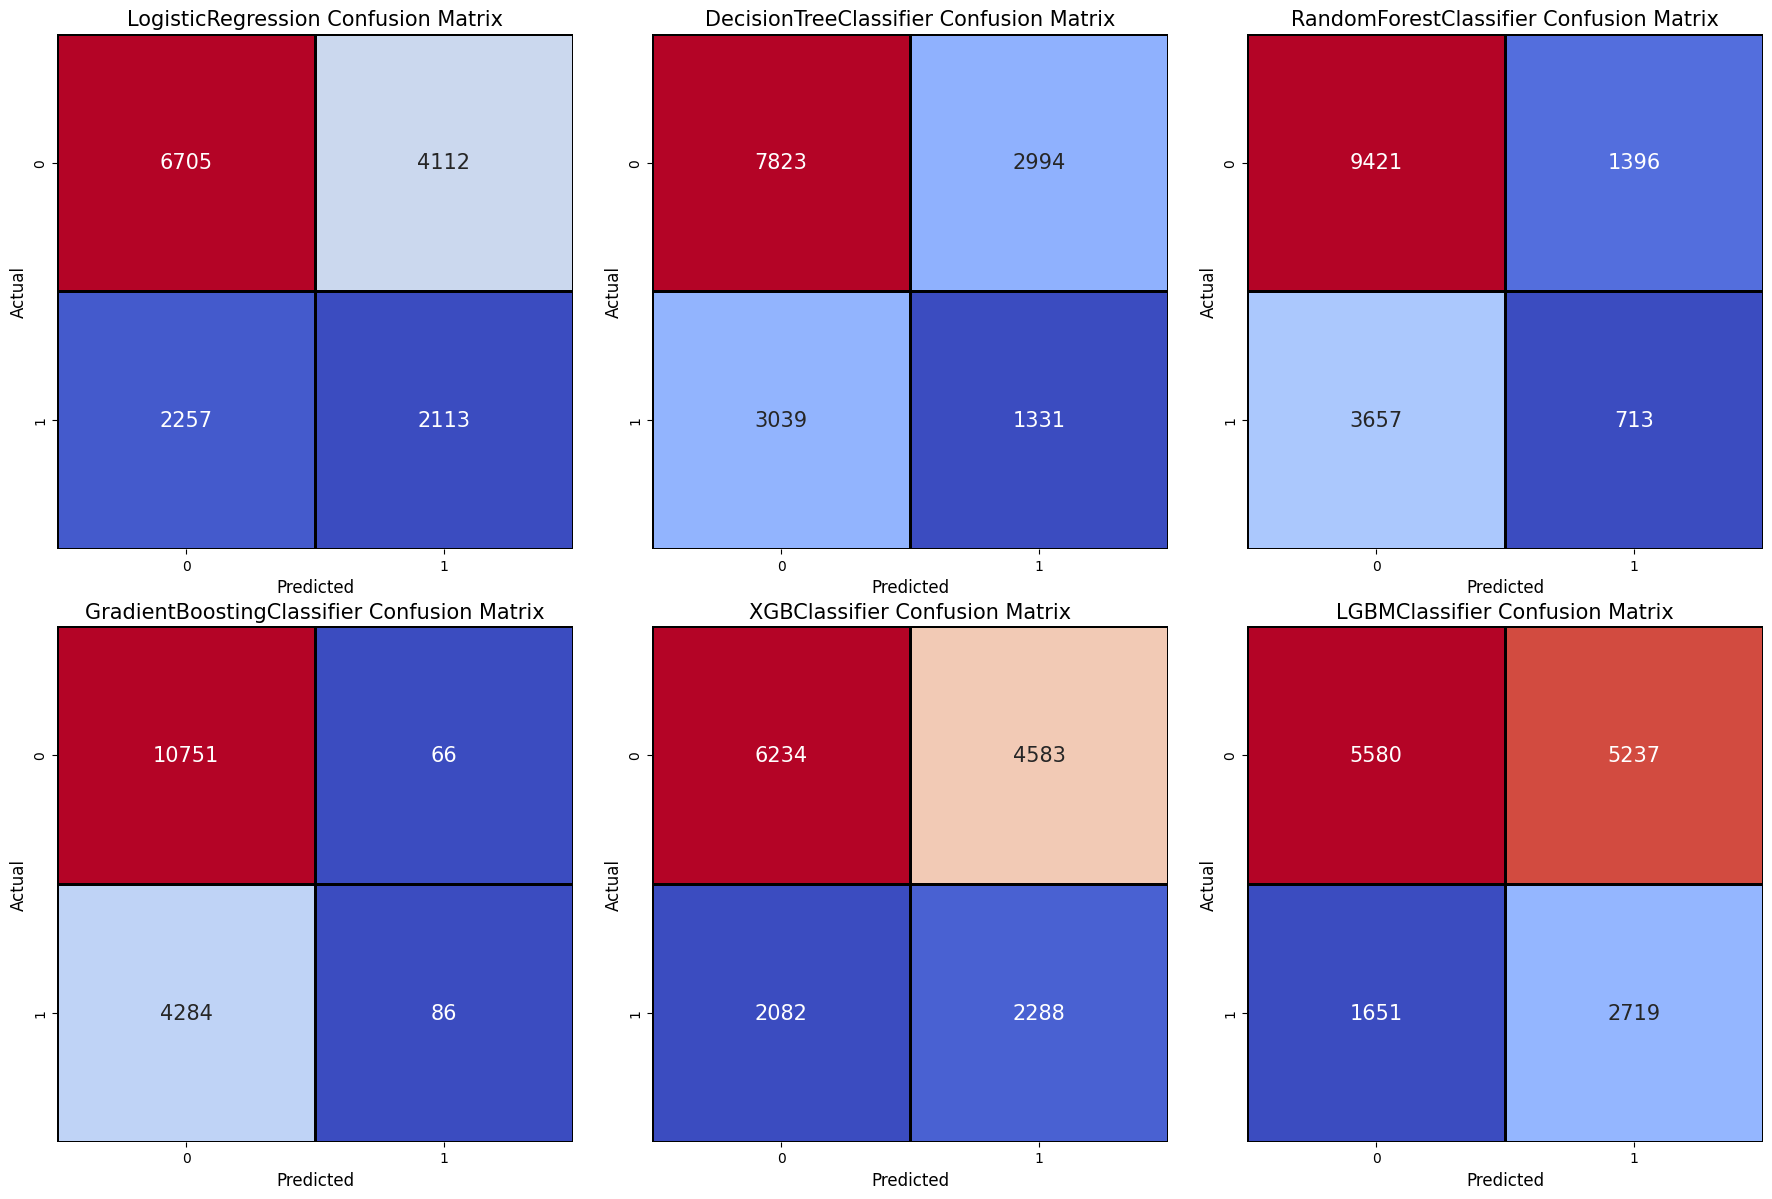

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pre_data as eda

# 모델 평가 함수 (크로스 밸리데이션 적용)
def evaluate_model_cv(model, X, y, cv):
    # 크로스 밸리데이션 평가 지표
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1')  # F1 스코어로 평가
    return np.mean(scores), np.std(scores)

# 1. 데이터 불러오기 및 전처리
data = pd.read_csv('./data/train.csv', encoding='cp949')
preprocessed_data = eda.preprocessing(data)

object_columns = preprocessed_data.select_dtypes(include=['object'])
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)

# 타겟 변수 및 독립 변수 설정
X = convert_data.drop('Churn', axis=1).astype(float)
y = convert_data['Churn'].astype(float)  # 이진 분류

# 모델 리스트 (가중치 balanced 적용)
models = [
    ('LogisticRegression', LogisticRegression(class_weight='balanced')),
    ('DecisionTreeClassifier', DecisionTreeClassifier(class_weight='balanced')),
    ('RandomForestClassifier', RandomForestClassifier(class_weight='balanced')),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('XGBClassifier', XGBClassifier(scale_pos_weight=y.value_counts()[0] / y.value_counts()[1])),
    ('LGBMClassifier', LGBMClassifier(scale_pos_weight=y.value_counts()[0] / y.value_counts()[1]))
]

# 2. 데이터셋 분할 및 PCA 적용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. PCA를 사용해 상관관계가 높은 피처 병합
X_train_pca, X_test_pca = eda.pca_merge_correlated_columns(X_train, X_test,0.6,0.6)
# 4. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_pca), columns=X_train_pca.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_pca), columns=X_test_pca.columns)

# 5. 크로스 밸리데이션 설정
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# 6. 모델 성능 평가 및 결과 저장
results = []

for name, model in models:
    mean_f1, std_f1 = evaluate_model_cv(model, X_train_scaled, y_train, cv)
    results.append({
        'Model': name,
        'mean_f1': mean_f1,
        'std_f1': std_f1
    })

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 결과 출력
print(results_df)

# 결과 데이터프레임 정렬
results_df = results_df.set_index('Model')
results_df = results_df.sort_values(by='mean_f1', ascending=False)
print(results_df)

def plot_confusion_matrices(models, X_train_scaled, X_test_scaled, y_train, y_test):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Subplot for each model
    axes = axes.flatten()

    for idx, (name, model) in enumerate(models):
        # Fit the model and predict
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=axes[idx], cbar=False, 
                    linewidths=1, linecolor='black', square=True, annot_kws={"size": 15})
        
        axes[idx].set_title(f'{name} Confusion Matrix', fontsize=15)
        axes[idx].set_xlabel('Predicted', fontsize=12)
        axes[idx].set_ylabel('Actual', fontsize=12)
        axes[idx].tick_params(axis='both', labelsize=10)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot confusion matrices
plot_confusion_matrices(models, X_train_scaled, X_test_scaled, y_train, y_test)